In [1]:
import mlrun

project = mlrun.get_or_create_project(name="mlrun-run-notifications", context="./")

> 2023-02-01 17:48:28,062 [info] Created and saved project mlrun-run-notifications: {'from_template': None, 'overwrite': False, 'context': './', 'save': True}
> 2023-02-01 17:48:28,063 [info] created project mlrun-run-notifications and saved in MLRun DB


In [14]:
project.set_function(name='get-data', func='get_data.py', kind='job', image='mlrun/mlrun')
project.set_function(name='train', func='train.py', kind='job', image='mlrun/mlrun')
project.set_function(name='serving', func='hub://v2_model_server')

In [15]:
project.set_workflow(name='main', workflow_path='training_pipeline.py')

In [16]:
project.save()

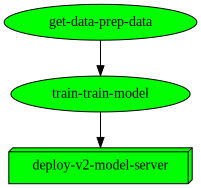

uid,start,state,name,parameters,results
...d2612afb,Feb 01 17:52:24,completed,train-train_model,label_column=targettest_size=0.2,
...143b6588,Feb 01 17:52:01,completed,get-data-prep_data,label_column=target,num_rows=150


In [17]:
run_id = project.run(
    name="main",
    arguments={'label_column': 'target', 'test_size' : 0.2}, # Arguments in Key Value format
    sync=True, # Get latest versions of all MLRun functions before running,
    watch=True # Wait for pipeline to execute before continuing (prints out graph)
)